### Importando bibliotecas e lendo o dataset

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

df = pd.read_csv("Fertilizer Prediction.csv")

### Entendendo o dataset

In [2]:
df.shape

(99, 9)

In [3]:
df.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [5]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [6]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [7]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [8]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [9]:
df.loc[df.duplicated()]

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name


In [10]:
df.isna()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


### Analisando dataset

<Axes: xlabel='Fertilizer Name', ylabel='count'>

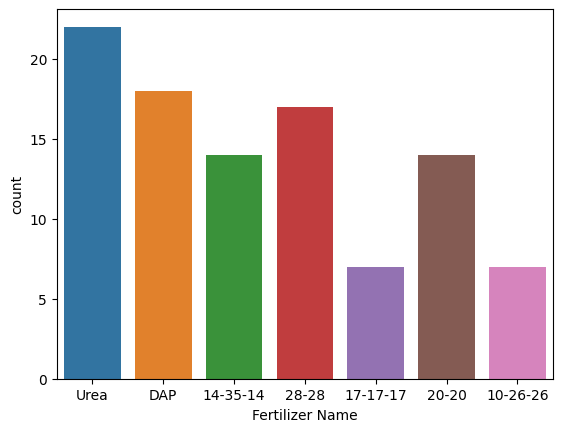

In [14]:
import seaborn as sns
sns.countplot(x='Fertilizer Name', data = df)

<Axes: xlabel='Soil Type', ylabel='count'>

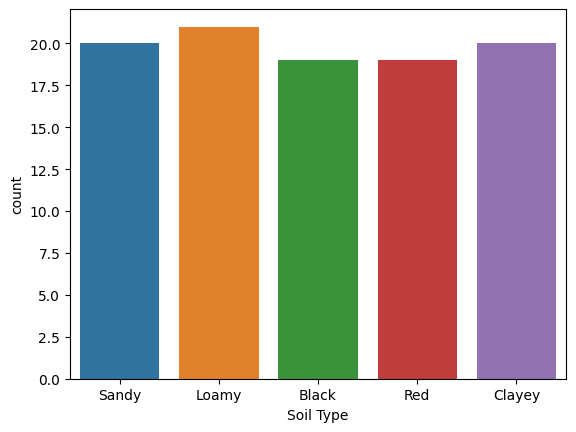

In [15]:
sns.countplot(x='Soil Type', data = df)


<Axes: xlabel='Crop Type', ylabel='count'>

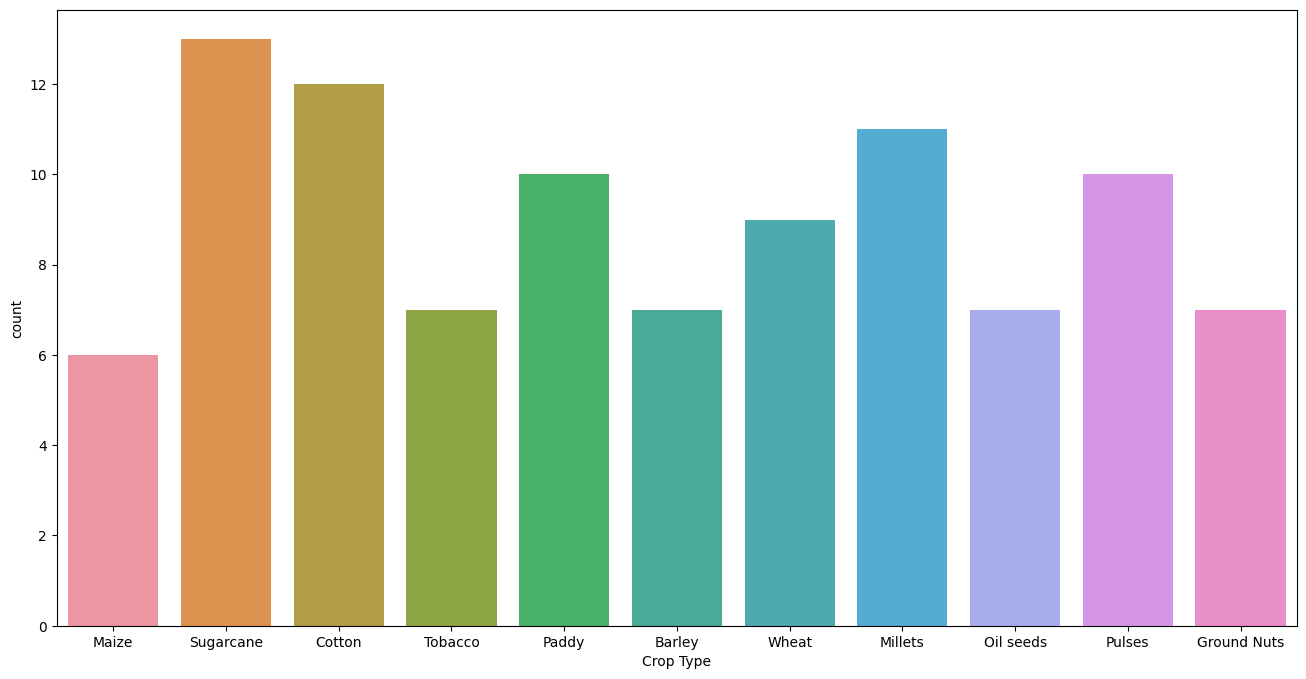

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = df)

Quantidade equilibrada de 'Crop Type' e 'Soil Type', mas alguns 'Fertilizer Name' ocorrem bem menos que outros

<Axes: xlabel='Fertilizer Name', ylabel='Temparature'>

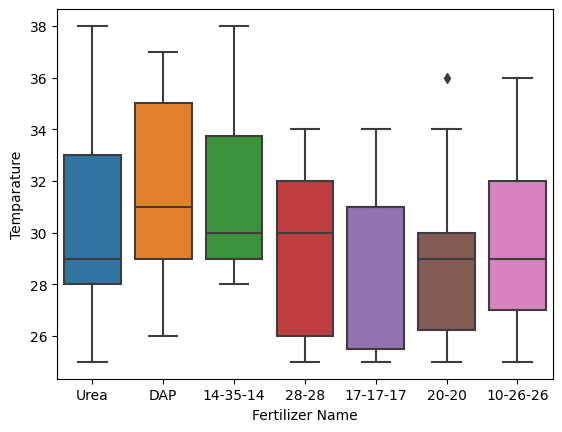

In [24]:
sns.boxplot(y = df['Temparature'], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Humidity '>

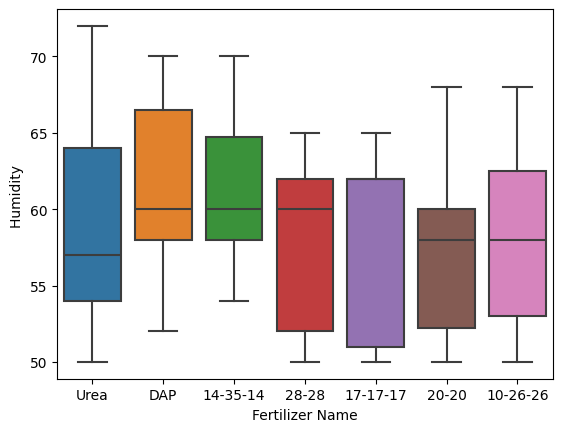

In [26]:
sns.boxplot(y = df['Humidity '], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Moisture'>

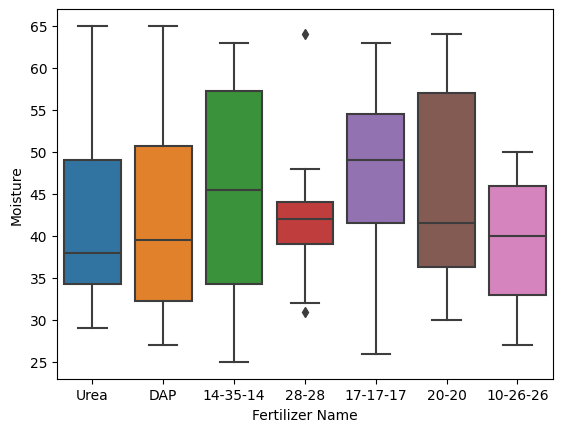

In [27]:
sns.boxplot(y = df['Moisture'], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Potassium'>

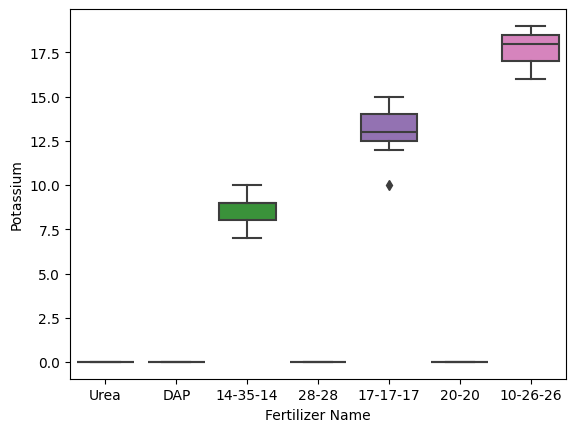

In [28]:
sns.boxplot(y = df['Potassium'], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Phosphorous'>

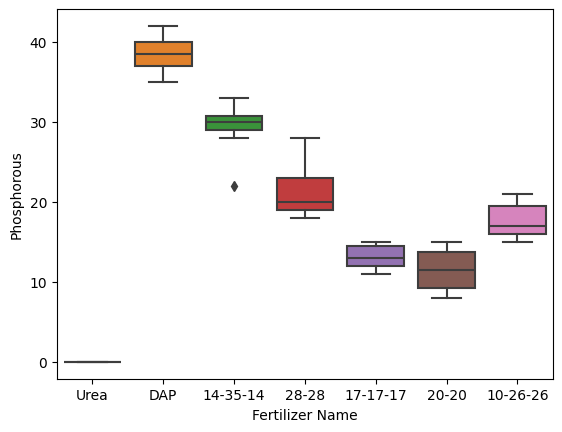

In [29]:
sns.boxplot(y = df['Phosphorous'], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Nitrogen'>

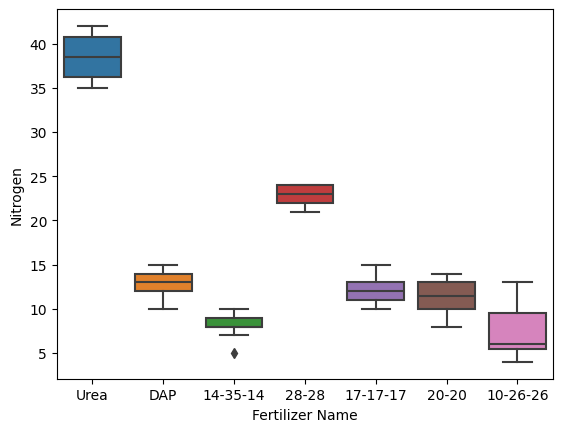

In [30]:
sns.boxplot(y = df['Nitrogen'], x = df['Fertilizer Name'])

### Label encoder

In [33]:
from sklearn.preprocessing import LabelEncoder

soil_encoder = LabelEncoder()
df['Soil Type'] = soil_encoder.fit_transform(df['Soil Type'])

df['Soil Type'].unique()

array([4, 2, 0, 3, 1], dtype=int64)

In [34]:
crop_encoder = LabelEncoder()
df['Crop Type'] = crop_encoder.fit_transform(df['Crop Type'])

df['Crop Type'].unique()

array([ 3,  8,  1,  9,  6,  0, 10,  4,  5,  7,  2])

In [35]:
fertilizer_encoder = LabelEncoder()
df['Fertilizer Name'] = fertilizer_encoder.fit_transform(df['Fertilizer Name'])

df['Fertilizer Name'].unique()

array([6, 5, 1, 4, 2, 3, 0])

### Separando dados para treino e teste

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


### Implementando Random Forest Classifier

In [43]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [50]:
from sklearn.metrics import accuracy_score, classification_report

pred_rand = rand.predict(x_test)

accuracy = accuracy_score(y_test, pred_rand)

print(classification_report(y_test,pred_rand))
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Accuracy: 0.9


Utilizando somente o Random Forest Classifier, a precisão do resultado é de 90%

### Hiper parâmetros "tunning" com GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Best score :  0.9748338081671415
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


Utilizando o GridSearchCV conseguimos chegar 97% !!! uma melhora muito grande

### Importando o ML como pickle para implementação com o Django 

In [ ]:
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()